# Vanilla embedding seq2seq experiment analysis

[Git commit](https://github.com/juditacs/morph-segmentation-experiments/commit/af3d16a0b5a73df2ef4877e10ddf21e40f9d85bc)

## Experimental setup

* dataset: Hungarian Webcorpus segmented using the output of HuNLP-Gate
  * segmentation converted to standoff tagging using two tags: B (beginning morpheme), E (continuation of morpheme)
* architecture: embedding seq2seq with a single LSTM/GRU layer
* 200000 unique words-segmentation pairs were used
* fixed parameters: `batch_size`=1000
* varying parameters uniformly sampled from these ranges:
 
| Parameter | Range |
| --- | --- |
| cell type | `['LSTM', 'GRU']` |
| cell size | `[16, 32, 64, 128, 256, 512, 1024]` | 
| embedding size | `range(2, 30)` |
| epochs | `[100, 200, 300, 400]` |

Earlier experiments used more epochs, but they obviously overfitted on the training data.

### Misc

* each output is prefixed with a GO symbol, but no END symbol is used (maybe I should have used one?)

In [1]:
import pandas as pd
import matplotlib

%matplotlib inline
matplotlib.style.use('ggplot')
matplotlib.pyplot.rcParams['figure.figsize'] = (10, 7)
matplotlib.pyplot.rcParams['font.family'] = 'sans-serif'

In [2]:
results = pd.read_table('../results/webcorp.tagset_BE.layer_1.sample_200000.tsv')
results.describe()

,cell_size,epochs,embedding_size,train_loss,test_loss
count,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000
mean,156.986684,234.332276,15.334813,0.269194,2.434497
std,164.639864,213.660783,7.993224,0.457001,2.157002
min,16.000000,2.000000,2.000000,0.000244,0.104645
25%,32.000000,100.000000,9.000000,0.006372,0.627683
50%,64.000000,200.000000,15.000000,0.026376,1.781726
75%,256.000000,400.000000,22.000000,0.056977,3.721912
max,512.000000,1000.000000,29.000000,1.614853,11.198904


## Cell type

it does not seem to matter very much

In [3]:
results.groupby('cell_type').describe()

cell_size  embedding_size       epochs   test_loss  \
cell_type                                                              
GRU       count  792.000000      792.000000   792.000000  792.000000   
          mean   154.666667       15.443182   237.325758    2.583782   
          std    162.809220        8.041096   211.766694    2.520865   
          min     16.000000        2.000000     2.000000    0.104645   
          25%     32.000000        9.000000   100.000000    0.489852   
          50%     64.000000       15.000000   200.000000    1.455557   
          75%    256.000000       23.000000   400.000000    4.369723   
          max    512.000000       29.000000  1000.000000   11.198904   
LSTM      count  785.000000      785.000000   785.000000  785.000000   
          mean   159.327389       15.225478   231.312102    2.283880   
          std    166.537475        7.948261   215.647780    1.701782   
          min     16.000000        2.000000     2.000000    0.148053   
          25%     32.000000        9.000000   100.000000    0.792478   
          50%     64.000000       15.000000   200.000000    2.006374   
          75%    256.000000       22.000000   300.000000    3.401764   
          max    512.000000       29.000000  1000.000000    9.547223   

                 train_loss  
cell_type                    
GRU       count  792.000000  
          mean     0.241625  
          std      0.425841  
          min      0.000244  
          25%      0.003155  
          50%      0.016441  
          75%      0.047660  
          max      1.614853  
LSTM      count  785.000000  
          mean     0.297008  
          std      0.485107  
          min      0.000693  
          25%      0.012437  
          50%      0.031733  
          75%      0.061536  
          max      1.569708

## Embedding size

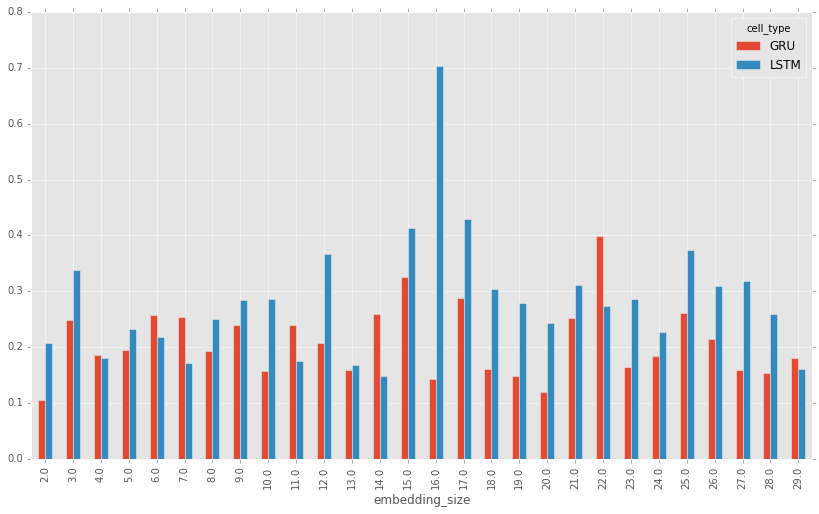

In [4]:
results.groupby(['embedding_size', 'cell_type']).min().unstack('cell_type').plot(y='test_loss', kind='bar', figsize=(14, 8))

## Cell size

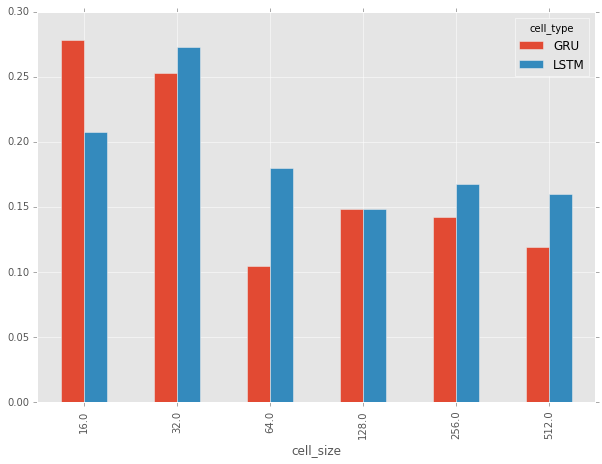

In [5]:
results.groupby(['cell_type', 'cell_size']).min().unstack('cell_type').plot(
    y='test_loss', kind='bar', figsize=(10, 7))

## Epoch number

After a few hundred epochs, it quickly overfits. Early stopping will be added to later experiments.

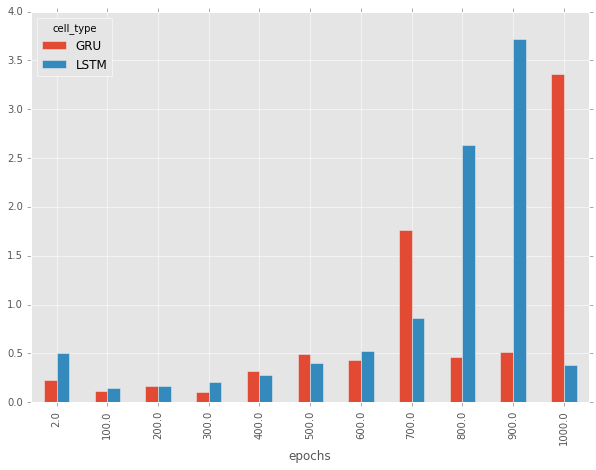

In [6]:
results.groupby(['cell_type', 'epochs']).min().unstack('cell_type').plot(
    y='test_loss', kind='bar', figsize=(10, 7))

Train loss basically disappears compared to test loss as the number of epochs increases.

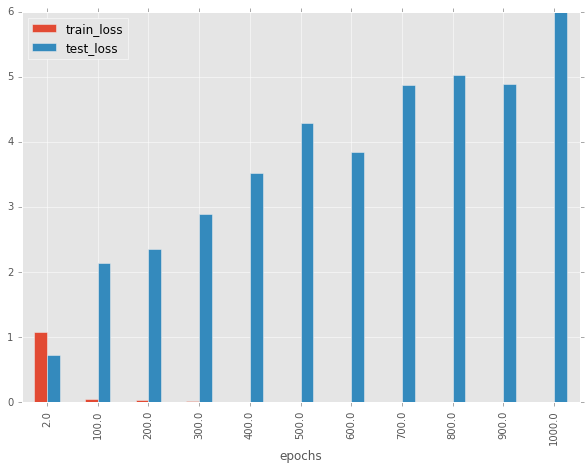

In [7]:
results.groupby('epochs').mean().plot(kind='bar', y=['train_loss', 'test_loss'], figsize=(10, 7))